# Otimização Natural - 1º Lista de exercícios
Aluno: Fernando Dias

Para essa lista de exercícios, foram utilizadas as seguintes bibliotecas:

In [1]:

# Bibliotecas do pip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.stats as stats

# Código escrito
from AlgoritmoMetropolis import AlgoritmoMetropolisHastings,DistribuicaoBoltzmann

## 1 - Método de Monte Carlo

Para calcular o resultado numérico da integral $\int_Q f(x) dx$ com o método de Monte Carlo, calcula-se a média dos valores de $f(x)$ com $x$ sendo sorteado uniformemente de $Q$. 

### Item 1-a

Utilizando os três números dados na questão, o método de monte-carlo resulta em:

In [2]:
# Usa os três valores dados da questão
a = np.array([0.9501,0.2311,0.6068])
# Aplica a função x^3 em cada resultado
a = a**3
# Tira o valor médio
np.mean(a)

0.3644719103879999

### Item 1-b

Dada que a distribuição utilizada é exponencial, o resultado da integração é equivalente a $\frac{1}{N}\sum x_i^2$ dos valores utilizados. Porém, como os limites de integração são $[0,1]$, os valores maiores que 1 devem ser descartados no somatório. Isso resulta no seguinte valor:

In [3]:
a = np.array([0.0512,0.4995,0.7216])
np.sum(a**3)/4

0.12512536157475002

## Questão 2 - Algoritmo de metrópolis

Temos $X\in{1,2,3,4,5}$, $J(x)=(x-3)^2$ e $T=1$.

### Item 2-a

Os fatores de Boltzmann para cada valor de $x$ é:

In [4]:
T = 1
x = np.array([1,2,3,4,5]) # Valores de X
J = lambda x: (x-3)**2 # Função custo
termos = np.exp(-J(x)/T) # Resultado
termos

array([0.01831564, 0.36787944, 1.        , 0.36787944, 0.01831564])

### Item 2-b

O algoritmo proposto serve para gerar números aleatórios que seguem qualquer distribuição discreta. Nesse caso, a distribuição de Boltzmann-Gibbs é formada com os termos $\exp(-J(x)/T)$ que já foram calculados no item anterior. 

Podemos criar um gerador de números aleatórios que utiliza a função de distribuição cumulativa. A função tem a forma:

In [5]:
# Calcula-se os pesos de cada estado em termos de densidade
densidade = termos/np.sum(termos)
# Calcula-se a densidade cumulativa (cdf) da distribuição
densidadeCumulativa = np.cumsum(densidade)
# Sorteia-se um número de uma distribuição uniforme entre 0 e 1
amostraUniforme = np.random.uniform(0,1)
# Compara-se esse valor com o valor da CDF
resultado = np.argmax(amostraUniforme < densidadeCumulativa)+1

resultado

3

Podemos utilizar também o algoritmo de metrópolis para obter esses números aleatórios. Nessa questão definimos a função do Algoritmo que será utilizada nas questões subsequentes:

<StemContainer object of 3 artists>

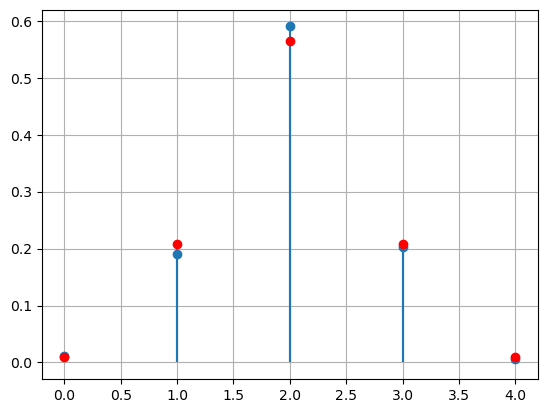

In [6]:
# Método de geração de valores aleatórios
# (Mesmo que a célula anterior, só que vetorialmente)
N = 1000
valoresUniformes = np.random.uniform(0,1,size=(N,1))
distribuicaoFormada = np.argmax(valoresUniformes < densidadeCumulativa[np.newaxis,:],axis=1)+1
# Conta quantos números cairam em cada estado
valores,dist = np.unique(distribuicaoFormada,return_counts=True) 
dist = dist/np.sum(dist) # Normaliza a distribuição (calcula a densidade)
# Gera o gráfico e insere a distribuição
plt.grid(True)
plt.stem(dist,basefmt=" ")
# Insere o resultado analítico em vermelho
plt.stem(densidade,basefmt=" ",markerfmt='r')

## Questão 3

Para gerar os estados do sistema com custo 

**Observação importante**: Nesse arquivo, a função do algoritmo de Metropolis usada é a variação `AlgoritmoMetropolisHastings`, que recebe qualquer função densidade de probabilidade (para um teste do algoritmo no apêndice). Para que essa função seja equivalente ao algoritmo de Metropolis visto em aula, a pdf a ser definida deve ser definida em termos da distribuição de Boltzmann. Isso é feito com uma função auxiliar chamada `DistribuicaoBoltzmann` que recebe uma função custo $J(x)$ e retorna a função da pdf $e^{-J(x)/T}$.

In [7]:
%%time

# Definição das variáveis
T = .1
FuncaoCusto = lambda x: (x**2)[0]
pdf = DistribuicaoBoltzmann(FuncaoCusto,T)
epsilon = .1
x = np.random.uniform(-1,1,size=(1,))
N = 10**5
numerosSaida = 1

# Execução do algoritmo de Metropolis-Hastings
res = AlgoritmoMetropolisHastings(
    x,             # Estado inicial
    pdf,           # PDF a ser seguida (Nesse caso, T implícito)
    N,             # Nº de iterações **antes de salvar os números**
    epsilon,       # fator multiplicativo da caminhada aleatória
    numerosSaida   # Nº de estados a salvar depois de N iterações
)

# Recebe o valor gerado aleatoriamente
data = res['xOut']

CPU times: user 1.26 s, sys: 25.8 ms, total: 1.28 s
Wall time: 1.25 s


## Questão 4

Para essa questão, é necessário que a função de pertubação $R$ seja simétrica $\mu_R=0$. Então a função proposta é remapeada para ${-1,1}$, ambos com $p(R=-1)=p(R=1)=0.5$

### Item 4-a

Como o algoritmo de metrópolis compara os estados em função da distribuição de boltzmann $f_X^{[B]}(x)=e^{-J(x)/T}$, devemos definir $J(x)$ de modo que $f_X^{[B]}(x)=f_X(x)$ qualquer.

Ao definir $J(x)=-T.\ln(f_X(x))$, temos:

$$f_X^{[B]}(x)=e^{\frac{-(-T\ln(f_X(x)))}{T}}=e^{\ln(f_X(x))}=f_X(x)$$

### Item 4-b

Para fazer com que o algoritmo de metropolis gere uma função arbitrária, basta fazer a operação inversa no item 4-a. Para a implementação do algoritmo segundo a variação Metropolis-Hastings, isso é equivalente a não passar a função custo pela função `DistribuicaoBoltzmann`.

Podemos ver um exemplo de execução abaixo para $X\sim \mathcal{N}(0,1)$

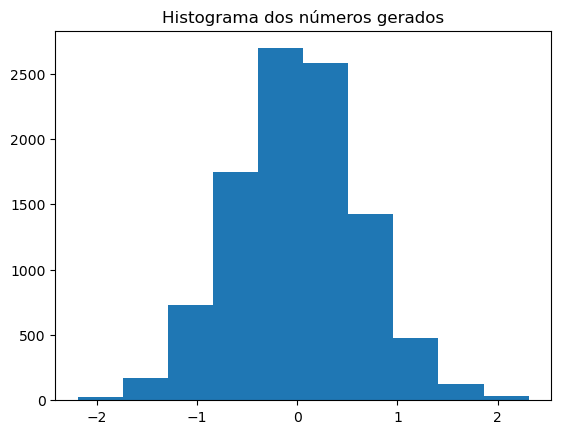

In [8]:
FuncaoCusto = lambda x: np.exp(-(x**2))[0]
epsilon = .5
x = np.random.uniform(-1,1,size=(1,))
N = 10**5
numerosSaida = 10000

res= AlgoritmoMetropolisHastings(
    x,
    FuncaoCusto,
    N,
    epsilon,
    numerosSaida,
    R=np.random.choice, # Aqui definimos uma nova função de pertubação
    Rargs=([-1,1],) # Parâmetros da função de pertubação
)

plt.title("Histograma dos números gerados")
_ = plt.hist(res['xOut'])

## Questão 5

Pode-se utilizar o Algoritmo de Metropolis com uma função custo equivalente a $f(x)=e^{-||x||_ 2^2}$ e calcular a integral de $\int_D ||x||_2^2dx$.

O algoritmo de metropolis deve ser modificado para acrescentar uma **função de rejeição**. Essa função vai olhar o estado candidato e determinar se ele pertence a uma região válida ou não. Se o estado candidato não pertence a região válida, o algoritmo descarta o estado candidato e inicia uma nova iteração.

A função de rejeição definida abaixo verifica se cada elemento do vetor $x_i$ está entre $[-1,1]$. No final, a média é ponderada em função de todos os números de saída.

In [9]:
resultados = AlgoritmoMetropolisHastings(
    np.random.uniform(-1,1,size=[1,]), # x0
    DistribuicaoBoltzmann(lambda x: np.linalg.norm(x)**2,1), # pdf
    10**4, # N
    0.05, # epsilon
    10**5, # nº saida
    FuncaoRejeicao=lambda x: (np.array([-1,-1]) > x).any() or (np.array([1,1]) < x).any()
)

np.sum(np.linalg.norm(resultados['xOut'],axis=0)**2)/(10**5)

0.23923580550142418

### Item 5-b

Para calcular o valor dessa integral, basta simplesmente substituir o termo $e^{-(x_1^2+x_2^2)}$ pelo resultado dessa distribuição, e calcular o valor da integral definida $$\int (x^1+x^2)dx$$.

## Questão 6

Como temos partículas em duas dimensões, temos $x\in\mathbb{R}^{10}$.

### Item 6-a

Para isso, basta apenas definir a função de custo como o $J(x)$ citado, acrescentá-la a distribuição de Boltzmann-Gibss e utilizar a mesma função definida anteriormente. 

Para fins de facilitar a implementação, trabalhamos com o tensor `x`, análogo a uma matriz $X\in\mathbb{R}^{5\times 2}$, para facilitar operações feitas em ordens distintas. Temos portanto que o estado pode assumir a seguinte forma:

In [10]:
x0 = np.random.uniform(-1,1,size=(5,2))
print("Tensor x0:")
print(x0)
print()
print("Operação de norma quadrática no eixo das dimensões de posição das partículas")
print("res:",np.power(np.linalg.norm(x0,axis=1),2))

Tensor x0:
[[ 0.98215288  0.3547076 ]
 [-0.94596031  0.53592824]
 [ 0.75696917  0.28904411]
 [-0.80073285 -0.65737388]
 [-0.43057974  0.24482598]]

Operação de norma quadrática no eixo das dimensões de posição das partículas
res: [1.09044176 1.18205999 0.65654883 1.07331353 0.24533868]


Com o tensor `x` nesse formato, calculamos a distância a origem das partículas fazendo a soma do vetor resultante anterior e calculamos as distâncias entre partículas da seguinte forma:

In [11]:
x = np.random.randint(-4,4,size=(5,2))
print("Tensor x")
print(x)
print()

print("Distancia entre todas as combinações de partículas")
matrizRepulsao = np.power(x[:,0][:,np.newaxis]-x[:,0][np.newaxis,:],2) + np.power(x[:,1][:,np.newaxis]-x[:,1][np.newaxis,:],2)
print(matrizRepulsao)
print()

print("Matriz triangular superior (remove duplicatas)")
matrizRepulsao = np.triu(matrizRepulsao)
print(matrizRepulsao)

Tensor x
[[-1  2]
 [-3 -3]
 [ 3 -2]
 [-4  2]
 [ 2 -1]]

Distancia entre todas as combinações de partículas
[[ 0 29 32  9 18]
 [29  0 37 26 29]
 [32 37  0 65  2]
 [ 9 26 65  0 45]
 [18 29  2 45  0]]

Matriz triangular superior (remove duplicatas)
[[ 0 29 32  9 18]
 [ 0  0 37 26 29]
 [ 0  0  0 65  2]
 [ 0  0  0  0 45]
 [ 0  0  0  0  0]]


Para o custo de repulsão é só somar os elementos da matriz acima.

Com isso, temos a definição de custo e o algoritmo de metropolis que gera a distribuição com base na temperatura:

In [12]:
%%time
def Custo(x):
    # Soma a distância à origem de todas as partículas
    custoDistanciaOrigem = np.sum(np.power(np.linalg.norm(x,axis=1),2))
    # Faz uma matriz que calcula a norma entre os elementos i e j
    matrizRepulsao = np.power(x[:,0][:,np.newaxis]-x[:,0][np.newaxis,:],2) + np.power(x[:,1][:,np.newaxis]-x[:,1][np.newaxis,:],2)
    # Filtra todos os valores repetidos (retorna só a matriz triangular superior)
    matrizRepulsao = np.triu(matrizRepulsao)
    # Soma os valores da matriz
    custoRepulsao = np.sum(matrizRepulsao)
    return custoDistanciaOrigem + 1/custoRepulsao

x0 = x = np.random.randint(-2,2,size=(5,2))
T = 10
pdf = DistribuicaoBoltzmann(Custo,T)

resultados = AlgoritmoMetropolisHastings(
    x0, # x0
    pdf, # pdf, que define T
    10**6, # N
    0.01, # epsilon
    1, # nº saida
)

CPU times: user 50.4 s, sys: 0 ns, total: 50.4 s
Wall time: 50.4 s


Observamos a configuração das partículas:

array([[ 0.20907418, -1.52945458],
       [-0.3411096 , -6.04493369],
       [-0.70547005, -7.1505252 ],
       [ 1.79811516, -5.94533019],
       [ 1.32900525, -2.93947223]])

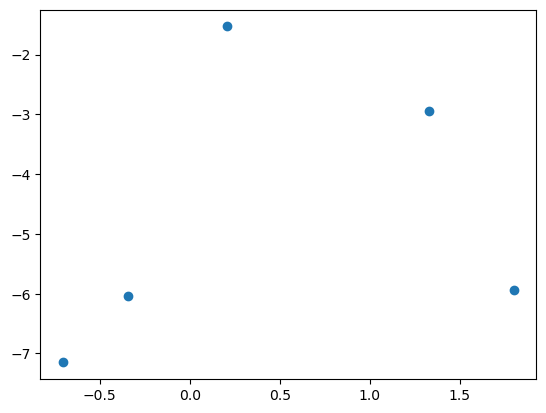

In [13]:
dadosMetropolis = resultados['xMin']
plt.scatter(dadosMetropolis[:,0],dadosMetropolis[:,1])
dadosMetropolis

### Item 6-b 

Temos que as probabilidades são respectivamente:

In [14]:
for r in [1,1.1291]:
    p1 = np.exp(-(4*r**2+6.5/r**2))
    p2 = np.exp(-(5*r**2+5/r**2))
    print(f"para r={r}, \t temos: P_1(r)/P_2(r)={p1/p2:.4f}")

para r=1, 	 temos: P_1(r)/P_2(r)=0.6065
para r=1.1291, 	 temos: P_1(r)/P_2(r)=1.1033


## Questão 7

A função de Simulated Annealing encapsula o algoritmo de metropolis e pode ser vista abaixo:

In [15]:
def SimulatedAnnealing(x0,Custo,T0,K=5,N=10**4,epsilon=0.01):
    x = x0.copy()
    T = T0
    jProg = np.array([])
    for k in range(K):
        pdf = DistribuicaoBoltzmann(Custo,T)
        resultados = AlgoritmoMetropolisHastings(
            x, # x0
            pdf, # pdf, que define T
            N, # N
            epsilon, # epsilon
            1, # nº saida
            passoSalvarProgressao=10000
        )
        x = resultados['xOut'][0]
        jProg = np.concatenate([jProg,resultados['jProg']])
        T = T0/np.exp(k)
    return resultados['xMin'],jProg

Executando o algoritmo 10 vezes, temos:

In [19]:
%pdb off
Custo = lambda x: (-x+100*((x-0.2)**2)*((x-0.8)**2))[0]

Nres = 10
result = np.zeros(Nres)
for i in range(Nres):
    result[i] = SimulatedAnnealing(np.array([0]),Custo,100,N=10**4,epsilon=1e-3)[0][0]

Automatic pdb calling has been turned OFF


In [20]:
result

array([-0.24136346, -0.0547447 , -0.04142852, -0.15437612,  0.38435838,
        0.01189714, -0.1694616 , -0.03289666, -0.20110607, -0.01891465])

## Questão 8 

Definimos uma função quadrática da forma $f(x)=x^2-7x+16$, que sabemos trivialmente que seu mínimo é em $x=7/2$ e seu valor é 

In [21]:
Custo = lambda x: ((x-3)*(x-4) + 4)[0]
Custo(np.array([7/2]))

3.75

Assim, definimos o problema do simulated annealing como:

In [22]:
%pdb on
resultado, jprog = SimulatedAnnealing(np.array([0]),Custo,1000,K=5,N=10**4,epsilon=1e-1)

Automatic pdb calling has been turned ON


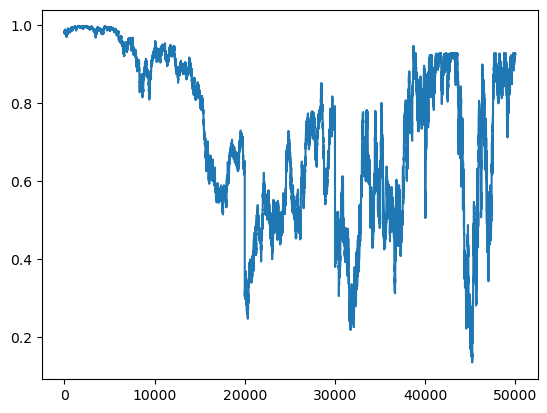

In [23]:
plt.plot(jprog)

In [24]:
resultado

array([-6.29539593])

Vemos que há algum erro na implementação, pois o resultado é ridículo.

# Apêndice - Algoritmo de Metropolis

In [25]:
import numpy as np

def DistribuicaoBoltzmann(FuncaoCusto,T):
    return lambda x : np.exp(-FuncaoCusto(x)/T)

def AlgoritmoMetropolisHastings(x0,FuncaoProbabilidade,N,epsilon,numerosSaida=1,passoSalvarProgressao=None,R=np.random.normal,Rargs=(0,1),FuncaoRejeicao=None):
    """
    Algoritmo de Metropolis modificado para ser um RNG de qualquer distribuição.
    Essa função tem as funcionalidades:
        * Escolha da quantidade de números de saída
        * Escolha do salvamento do progresso de custo e estados ao longo das iterações
        * Modificação do 
        * Definição da função de passo e seus argumentos
    Parâmetros:
        * x0: Estado inicial. Deve ser um array com as dimensões dos números de estados
        * FuncaoDensidadeProbabilidade: Função cuja densidade de probabilidade deve ser seguida.
            * Para seguir o algoritmo de metropolis original, recebe aqui a distribuição Boltzmann-Gibbs
        * N: Número de iterações **antes de começar a salvar os números**.
        * epsilon: Magnitude do passo aleatório dado
        * numerosSaida: Quantidade de números a serem gerados
        * passoSalvarProgressao: Quantidade de valores a serem salvos durante o processo de iteração
            * Amostra em x pontos distribuídos de forma igualmente espaçada entre 0 e N
        * R: Função de passo. Recebe um RNG que segue a distribuição para o passo da caminhada aleatória.
        * Rargs: Argumentos da função R
        * FuncaoRejeicao: 
    Retorna:
        * xOut: os <numerosSaida> valores de x
        * jOut: a probabilidade desses números aparecerem
        * xMin: Melhor resultado encontrado ao longo de todo o processo
        * jMin: Custo do melhor resultado
        * xProg: Os estados ao longo das iterações 
        * jProg: Os custos respectivos
    """
    # Definições de variáveis inicia
    x = x0.copy()
    xMin = x.copy()
    if not type(x) is np.ndarray:
        raise Exception("x0 deve ser do tipo np.array")
    
    j = FuncaoProbabilidade(x0)
    jMin = j
    if not np.isscalar(j):
        raise Exception(f"A PDF deve retornar um valor escalar (python ou numpy (retornou {type(j)})")
    
    # Inicialização de variáveis de saída
    xOut = np.zeros((numerosSaida,*x.shape))
    jOut = np.zeros(numerosSaida)
    
    indiceSalvamento = N - numerosSaida

    # Inicialização de variáveis de progresso
    xProg,jProg = (None, None)
    if passoSalvarProgressao:
        valorEfetivo = int(N/np.floor(N/passoSalvarProgressao))
        xProg = np.zeros((valorEfetivo,*x.shape))
        jProg = np.zeros((valorEfetivo))
        indiceSalvar = 0

    # -----------------------------------------------------
    #
    #       LOOP PRINCIPAL DO ALGORITMO DE METROPOLIS
    #
    # ----------------------------------------------------
    for n in range(N+numerosSaida):
        xhat = x + epsilon*(R(*Rargs,size=x.shape))
        # Se função é definida, pula se a função rejeita o estado atual
        if FuncaoRejeicao and FuncaoRejeicao(xhat):
            continue
        jhat = FuncaoProbabilidade(xhat)
        sorteio = np.random.uniform(0,1)
        # Se a prob de ir pro estado novo é maior que ir pro estado atual, 
        # ele sempre vai para o estado novo.
        if sorteio < np.min([1,(jhat/j)]): 
            x = xhat.copy()
            j = jhat.copy()
    # -----------------------------------------------------
    # -----------------------------------------------------
            # Salva se o valor encontrado for o menor
            if j < jMin:
                xMin = x.copy()
                jMin = j
            
        # Salva o progresso a cada múltiplo de iterações
        if passoSalvarProgressao and (n % np.floor(N/passoSalvarProgressao)) == 0 and indiceSalvar < xProg.shape[0]:
            xProg[indiceSalvar] = x
            jProg[indiceSalvar] = j
            indiceSalvar += 1
        
        # Salva os numeroSaida números finais
        if n >= N:
            xOut[n-N] = x.copy()
            jOut[n-N] = j.copy()

    results = {
        'xOut':xOut,
        'jOut':jOut,
        'xMin':xMin,
        'jMin':jMin,
        'xProg':xProg,
        'jProg':jProg
    }
    return results


